# MNIST Digit Classification
Digit classification from 28*28 greyscale images (multiclass classification problem) using my own neural net framework.

In [1]:
%matplotlib inline
import numpy as np
np.set_printoptions(suppress=True)
import math
import random as rd
from NN_framework import NeuralNet
import matplotlib.pyplot as plt
from keras.datasets import mnist #keras is only used to load the mnist dataset

## Load the dataset

In [2]:
(train_X, train_Y_raw), (test_X, test_Y_raw) = mnist.load_data()
train_X = train_X.reshape((-1, 28*28)).T
test_X = test_X.reshape((-1, 28*28)).T
train_Y_raw = train_Y_raw.reshape((-1, 1)).T
test_Y_raw = test_Y_raw.reshape((-1, 1)).T
print(train_X.shape)
print(train_Y_raw.shape)
print(test_X.shape)
print(test_Y_raw.shape)

(784, 60000)
(1, 60000)
(784, 10000)
(1, 10000)


In [3]:
#one hot encoding the target matrices
num_classes = len(np.unique(train_Y_raw))
train_Y = np.eye(num_classes)[train_Y_raw][0].T
test_Y = np.eye(num_classes)[test_Y_raw][0].T
print(train_Y.shape)
print(test_Y.shape)

(10, 60000)
(10, 10000)


In [4]:
def plot_images(set, enable_prediction=False, model=None):
    # plots 64 random examples along with the output label from the train/test set
    X, Y = set
    fig, ax = plt.subplots(8, 8, figsize=(10,10))
    row, col = 0, 1
    for i in range(64):
        rand_n = rd.randrange(0, Y.shape[1])
        example = X[:, rand_n].reshape((28, 28))
        label = Y[:, rand_n][0]
        title_text = f"Label: {label}"
        if enable_prediction:
            pred = model.forward_pass(model.trained_param, X[:, rand_n])
            pred = np.argmax(pred)
            title_text = f"({label}, {pred}*)"
        ax[row,col-1].imshow(example, cmap=plt.get_cmap('gray'))
        ax[row,col-1].set_title(title_text)
        ax[row,col-1].axis('off')
        col += 1
        if 8//col == 0:
            row += 1
            col = 1
    fig.tight_layout()

### Few random images from the dataset along with their labels.

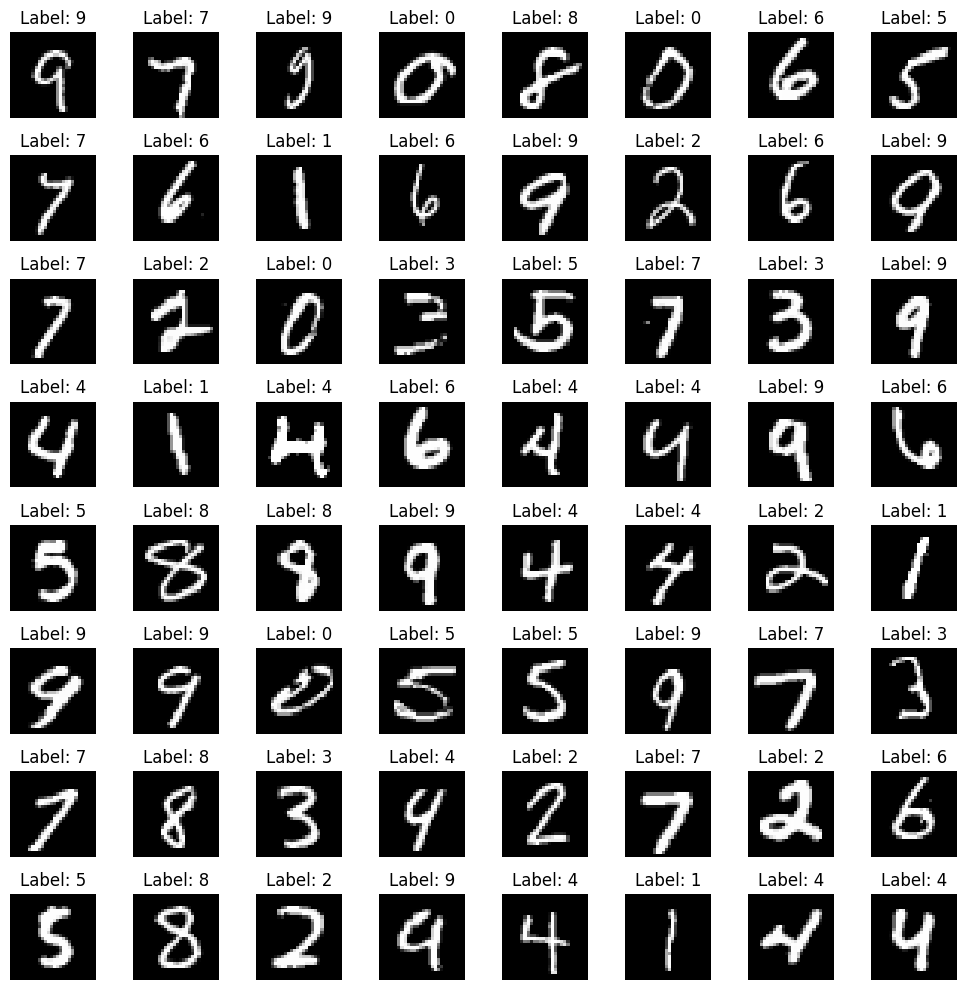

In [5]:
plot_images(set=(train_X, train_Y_raw))

In [39]:
#initialize the model
nodes = [128, 64, 32, 10]
activations = ['relu', 'relu', 'relu', 'softmax']
model = NeuralNet(train_X, train_Y, nodes, activations, 'multiclass')

W1 shape: (128, 784)
b1 shape: (128, 1)
W2 shape: (64, 128)
b2 shape: (64, 1)
W3 shape: (32, 64)
b3 shape: (32, 1)
W4 shape: (10, 32)
b4 shape: (10, 1)
Total Parameters: 111146


In [40]:
model.train(220, -1, 0.005, lambd=0)

At epoch 0 --> Accuracy: 10.828 | Cost: 2.302235102038821
At epoch 22 --> Accuracy: 87.347 | Cost: 0.42282145968465457
At epoch 44 --> Accuracy: 95.193 | Cost: 0.16109633030641768
At epoch 66 --> Accuracy: 97.693 | Cost: 0.07611699249767717
At epoch 88 --> Accuracy: 98.848 | Cost: 0.04010001102058274
At epoch 110 --> Accuracy: 99.57 | Cost: 0.018558485283413292
At epoch 132 --> Accuracy: 99.873 | Cost: 0.008423635283029465
At epoch 154 --> Accuracy: 99.962 | Cost: 0.0038322559934545735
At epoch 176 --> Accuracy: 99.982 | Cost: 0.0018145650838239287
At epoch 198 --> Accuracy: 99.995 | Cost: 0.0009768555906873083
At epoch 220 --> Accuracy: 99.998 | Cost: 0.0005911633872609622


In [43]:
model.X_test = test_X
model.Y_test = test_Y

In [41]:
model.compute_performance(model.trained_param, 'train', 0) #performance on train set

Correct: 59999 | Incorrect: 1
Accuracy: 99.998 | Cost: 0.0005911633872609622


In [44]:
model.compute_performance(model.trained_param, 'test', 0) #performance on test set

Correct: 9715 | Incorrect: 285
Accuracy: 97.15 | Cost: 0.2136277739621149


Text(0.5, 1.0, 'Epoch vs Cost')

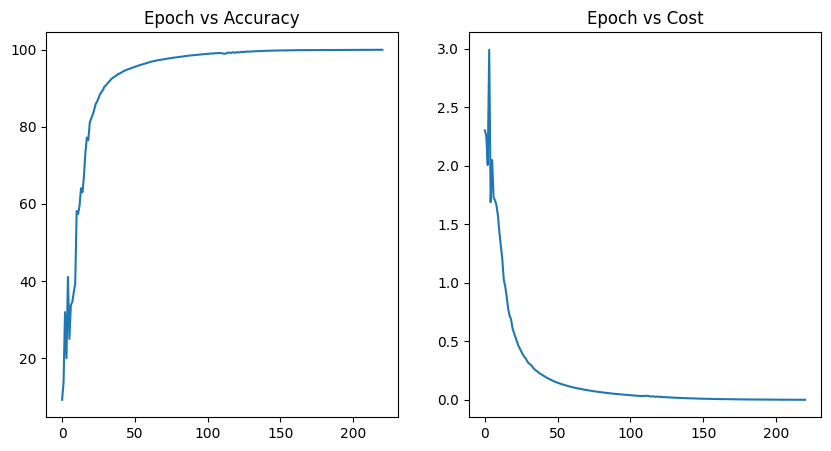

In [38]:
fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].plot(model.accuracy_hist)
ax[0].set_title('Epoch vs Accuracy')
ax[1].plot(model.cost_hist)
ax[1].set_title('Epoch vs Cost')

### Plotting random predictions from the train set
(Left - actual label | Right - predicted label)


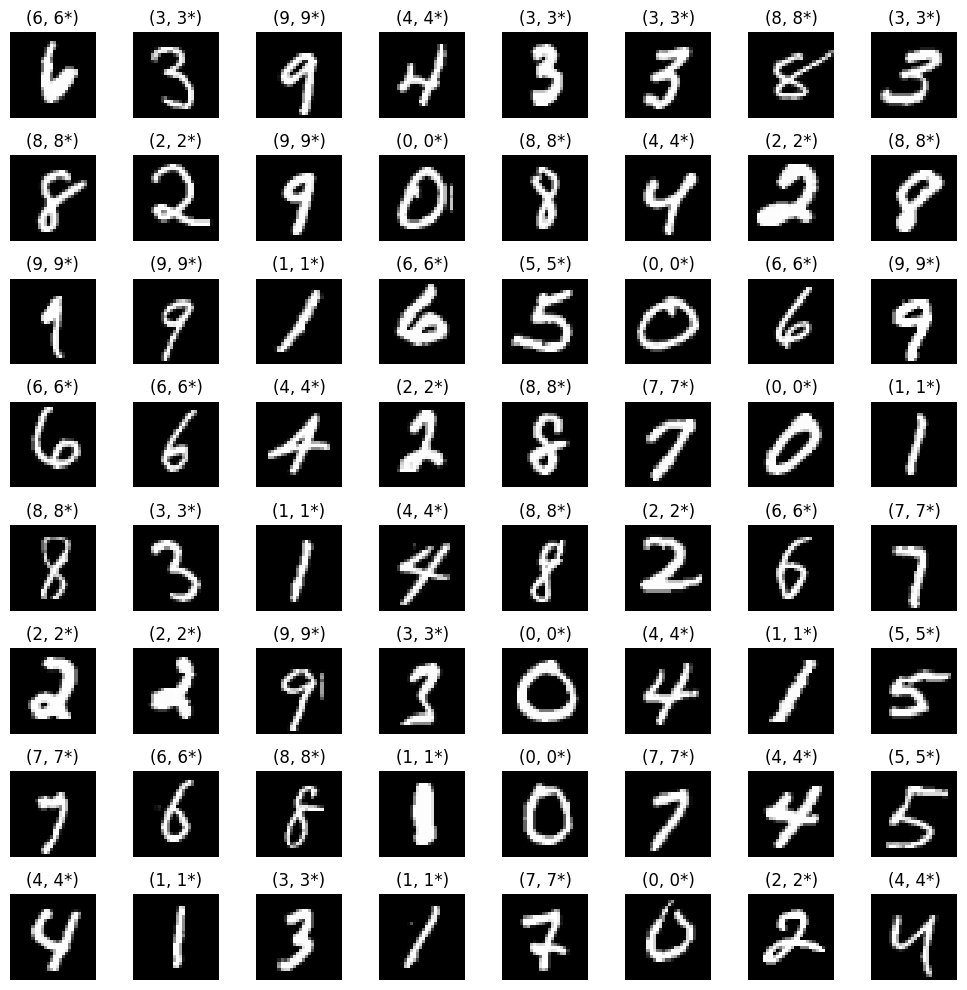

In [45]:
plot_images(set=(train_X, train_Y_raw), enable_prediction=True, model=model) #plotting predictions on the train set

### Plotting random predictions from the test set
Left - actual label | Right - predicted label

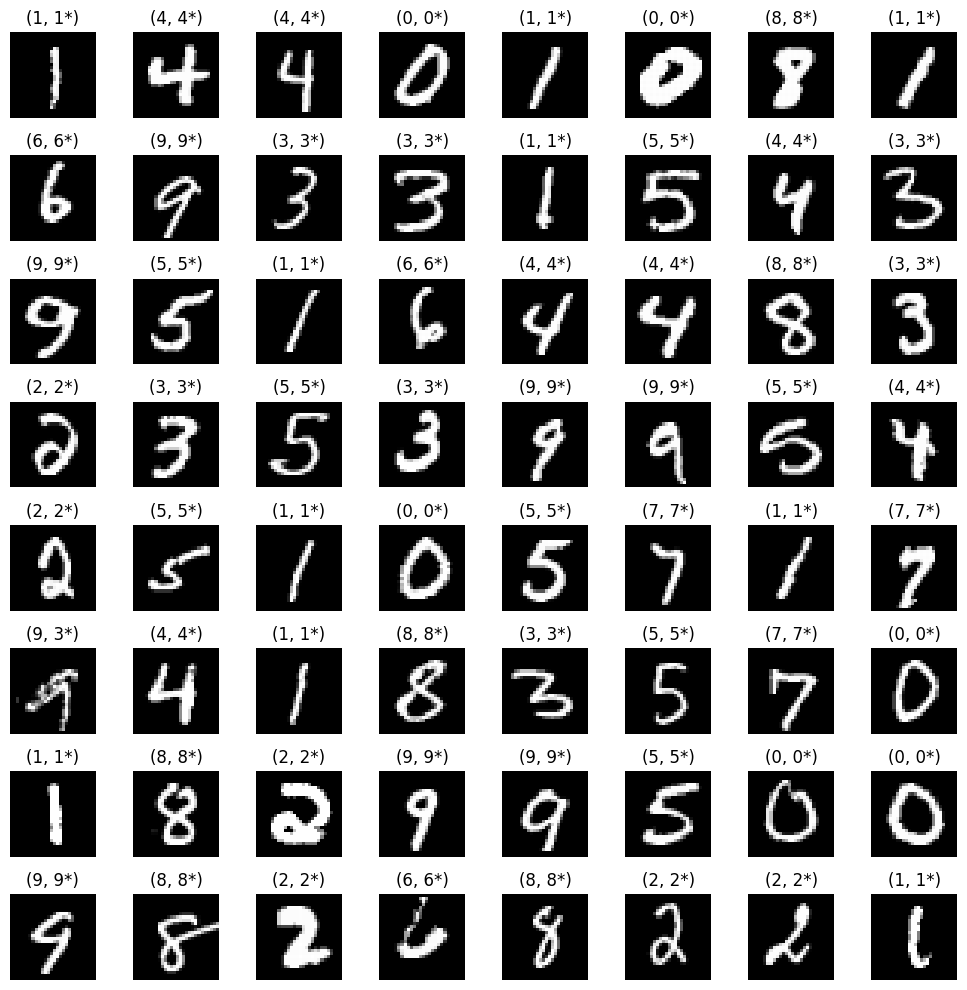

In [46]:
plot_images(set=(test_X, test_Y_raw), enable_prediction=True, model=model) # plotting prediction on the test set

In [48]:
# plotting examples that the model got wrong
train_pred = model.forward_pass(model.trained_param, train_X)
train_pred = np.argmax(train_pred, axis=0)
train_incorr = np.where(train_pred != train_Y_raw)[1]

test_pred = model.forward_pass(model.trained_param, test_X)
test_pred = np.argmax(test_pred, axis=0)
test_incorr = np.where(test_pred != test_Y_raw)[1]

In [50]:
# plotting 64 incorrect predictions from the train set
#WE HAVE 100% ACCURACY ON THE TRAIN SET!
#plot_images(set=(train_X[:, train_incorr], train_Y_raw[:, train_incorr]), enable_prediction=True, model=model)

### Plotting incorrectly labelled examples from the test set

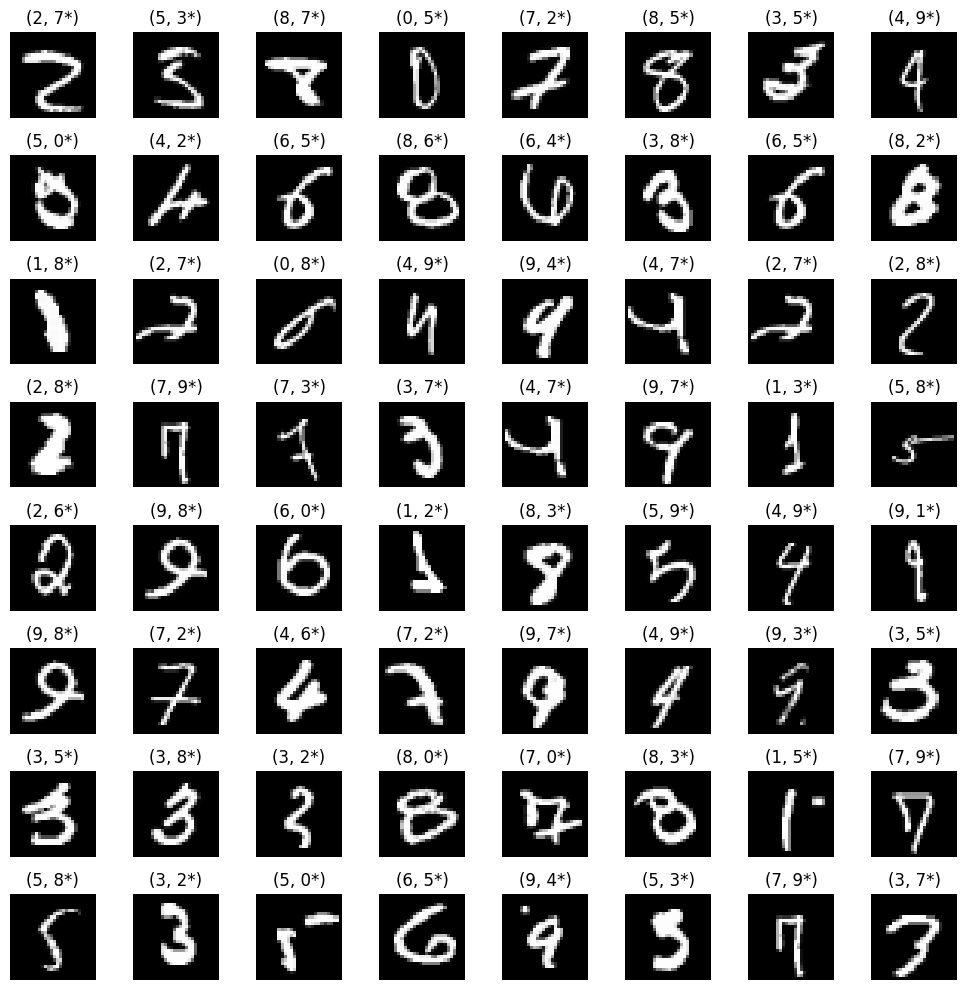

In [51]:
# plotting 64 incorrect predictions from the test set
plot_images(set=(test_X[:, test_incorr], test_Y_raw[:, test_incorr]), enable_prediction=True, model=model)

In [52]:
import pickle
def save_parameters(model, filename):
    nodes = model.nodes
    activations = model.activations
    trained_param = model.trained_param
    data = [nodes, activations, trained_param]
    with open(filename, 'wb') as file:
        pickle.dump(data, file)

In [54]:
#save_parameters(model, 'mnist_model.dat')